# Problem Statement:

# Sales Channel Prediction Case Study 

Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 

# Importing Libraries

In [224]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from subprocess import check_output
from sklearn import metrics

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

from sklearn import preprocessing
from collections import Counter

pd.set_option('max_columns',None)

from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [225]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv',index_col='Unnamed: 0')
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [226]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All the columns have float values

In [227]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [229]:
# The dataset has 200 rows and 4 columns
df.shape

(200, 4)

In [230]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

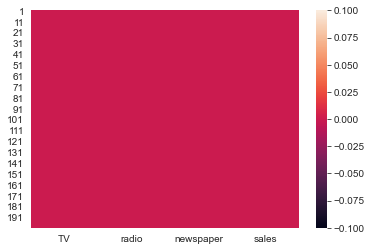

In [231]:
sns.heatmap(df.isnull())

# Summary Statistics

In [232]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# To Check correlation

In [233]:
dfcor=df.corr()
dfcor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

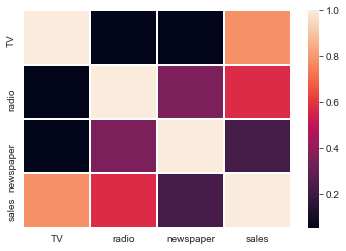

In [234]:
plt.figure
sns.heatmap(dfcor,linewidths=1)

<AxesSubplot:>

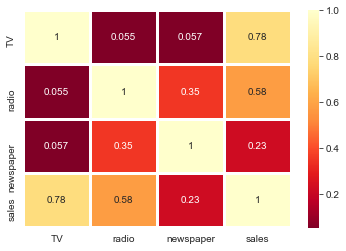

In [235]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True,linewidths=2)

# Univariate analysis

<AxesSubplot:>

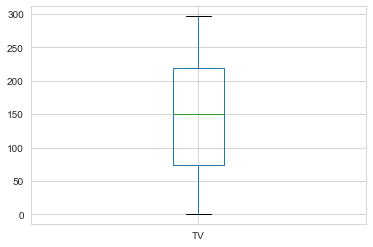

In [236]:
# NO outliers are present
df['TV'].plot.box() 

<AxesSubplot:>

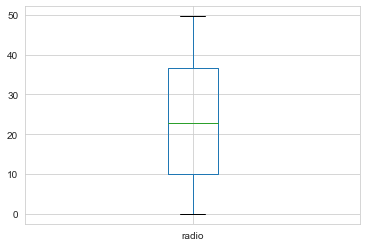

In [237]:
# NO outliers
df['radio'].plot.box()

<AxesSubplot:>

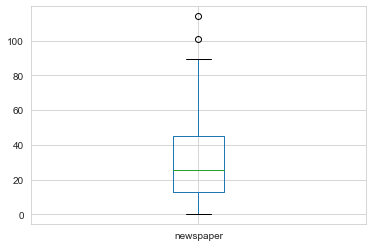

In [238]:
# Few outliers are present
df['newspaper'].plot.box()

# To check Skewness

<AxesSubplot:xlabel='TV', ylabel='Density'>

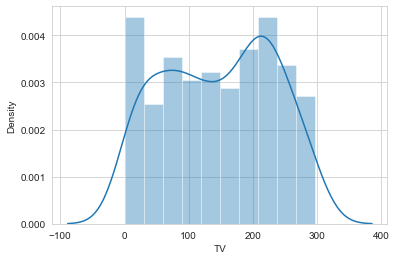

In [239]:
# plotting TV column
sns.distplot(df['TV'],bins=10)

<AxesSubplot:xlabel='radio', ylabel='Density'>

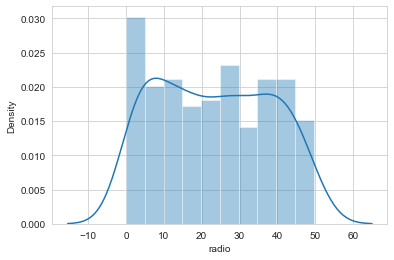

In [240]:
sns.distplot(df['radio'],bins=10)

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

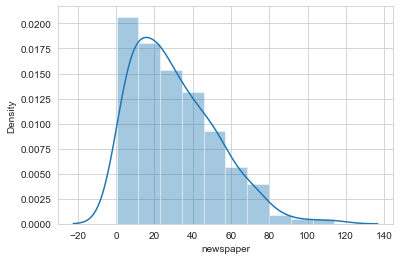

In [241]:
sns.distplot(df['newspaper'],bins=10)

In [242]:
# Making collist variable and all the columns values into the variable
collist=df.columns.values

In [243]:
ncol=4
nrows=10

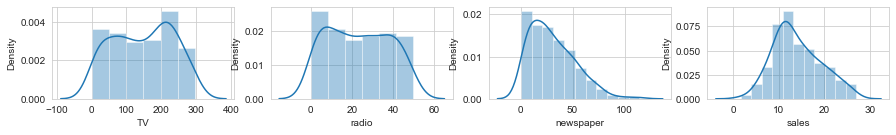

In [244]:
plt.figure(figsize=(15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

TV and radio columns have skeweness more than compared to newspaper column

# Bi-variate analysis

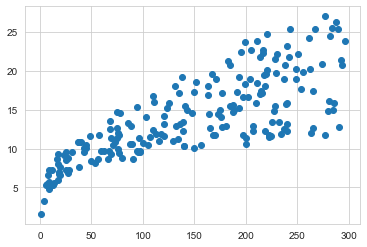

In [245]:
plt.scatter(df['TV'],df['sales'])

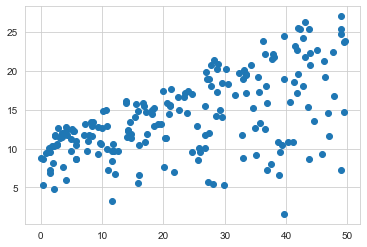

In [246]:
plt.scatter(df['radio'],df['sales'])

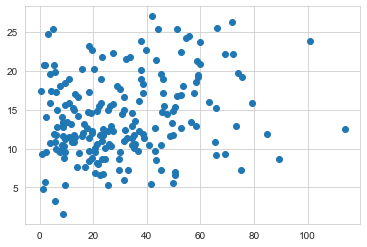

In [247]:
plt.scatter(df['newspaper'],df['sales'])

<AxesSubplot:xlabel='TV', ylabel='sales'>

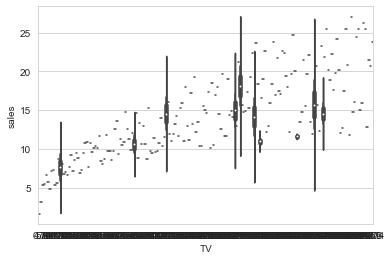

In [248]:
sns.violinplot(data=df,x='TV',y='sales')

<AxesSubplot:xlabel='newspaper'>

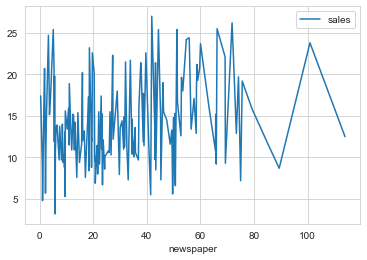

In [296]:
# Pivot table showing by sales and index newspaper
df.pivot_table('sales',index='newspaper').plot()

<AxesSubplot:xlabel='sales', ylabel='count'>

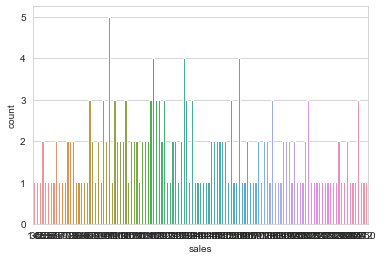

In [250]:
sns.set_style("whitegrid")
sns.countplot(x='sales',data=df)

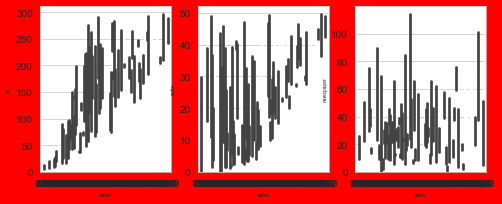

In [251]:
plt.figure(figsize=(8,14),facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=3:
        ax=plt.subplot(4,3,plotnumber)
        sns.barplot(x='sales', y=column, data=df)
        plt.ylabel(column,fontsize=5)
        plt.xlabel('sales',fontsize=5)
    plotnumber+=1
plt.show()

Tv and radio column is directly proportional to sales where newspaper is going parallely with sales column

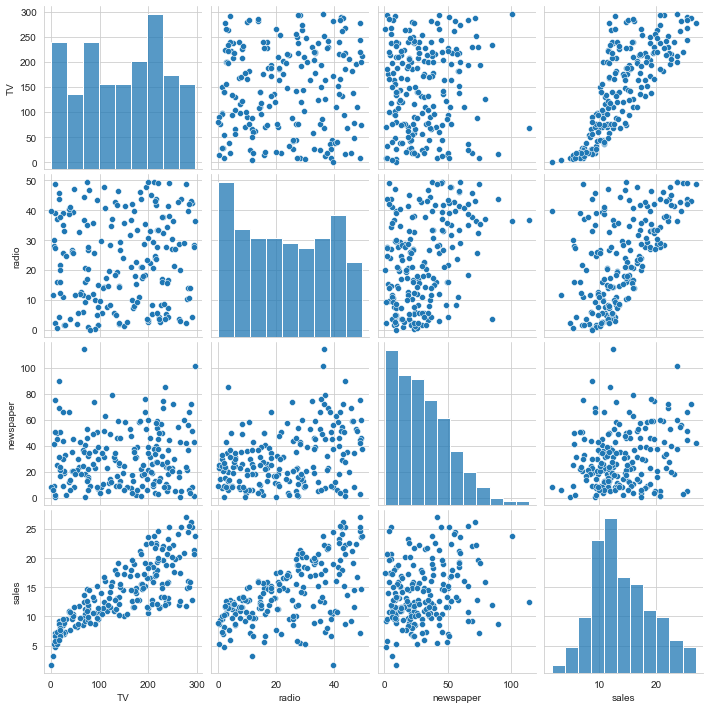

In [252]:
sns.pairplot(df)

# Removing Outliers : Z-Score

In [253]:
# appling z-score on dataset df

In [254]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [255]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [256]:
z[16][2]

3.8411707150992718

In [257]:
z[101][2]

3.238153957342154

In [258]:
# Removing 2 rows consist of oultiers
df_new=df[(z<3).all(axis=1)]

In [259]:
df_new

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


After applying , z-score we can see that we have also lost only 2 rows and df_new is the new dataset

In [260]:
# 198 rows and 4 columns
df_new.shape

(198, 4)

In [261]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

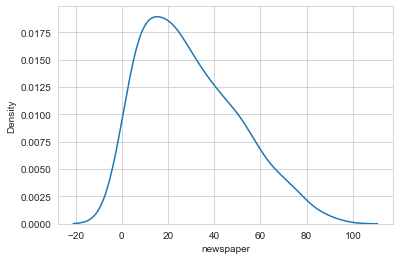

In [262]:
sns.kdeplot(df_new["newspaper"])

# Skewness Removal

In [263]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Observation:
    We can see that no skewness is there in any column as values lies b/w -.5 to +.5. So, outliers and skewness have been removed.

# Seperating target and independent variable

In [264]:
y = df_new.sales
x = df_new.drop('sales',axis=1)

In [265]:
x

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [266]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 198, dtype: float64

# train_test_split

In [267]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=43)

# Linear Regression

In [268]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [269]:
lm.score(x_train,y_train)

0.9092806386708117

The lm score for training data is 91 percent

In [270]:
lmpred=lm.predict(x_test)

In [271]:
lm.score(x_test,y_test)

0.8623221057555003

The lm score for testing data is 87 percent

In [272]:
lm.coef_

array([ 0.04406653,  0.1947541 , -0.0021925 ])

In [273]:
from sklearn.metrics import mean_squared_error,r2_score

print("MSE=",mean_squared_error(y_test,lmpred))

print("R2 score=",r2_score(y_test,lmpred))

MSE= 3.9586739097734283
R2 score= 0.8623221057555003


MSE and R2 score is 3.95 and 86 percent  resp.

# Lasso-Ridge

In [274]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.metrics import r2_score

In [275]:
lasscv = LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [276]:
alpha = lasscv.alpha_
alpha

0.007591843045325665

In [277]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.007591843045325665)

In [278]:
Final_mod=lasso_reg.score(x_test,y_test)
Final_mod*100

86.23305899889951

Lasso accuracy is 86 percent and alpha value= 0.007

In [279]:
# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

# calculate RMSLE (SCORE func).
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred - y)**2)) / len(y))**1/2

# SCORING func for Cross Validation (RandomizedSearchCV)
scorer = make_scorer(score_func = score, greater_is_better=True)

In [280]:
# Support Vector Machine
svm = SVR(gamma='scale')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(svm, score(y_pred,y_test))

SVR() 0.9684769160191988


Accuracy is 97 percent using SVR

In [281]:
# KNeighbors Regressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(knn, score(y_pred,y_test))

KNeighborsRegressor() 0.9805674563988422


Accuracy is 98 percent using KNN

In [282]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(dt, score(y_pred,y_test))

DecisionTreeRegressor() 0.9925400044932187


Accuracy is 99 percent using Decision Tree Regressor

In [283]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(rf, score(y_pred,y_test))

RandomForestRegressor() 0.9877384732804064


Accuracy is 99 percent using Random Tree Regressor

In [284]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [285]:
dt.score(x_train,y_train)

1.0

In [286]:
dt.score(x_test,y_test)

0.9456001737393848

We got 100% score on training data.

In [287]:
from sklearn.metrics import*
from sklearn.model_selection import*

In [288]:
# Hyper parameters range intialization for tuning 
#Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [289]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [290]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [291]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [292]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [293]:
final_rf = RandomForestRegressor(n_estimators= 400,
                                 min_samples_split= 5,
                                 min_samples_leaf= 5,
                                 max_features= 'auto',
                                 max_depth= 15)

In [294]:
final_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=400)

In [295]:
Final_mod = final_rf.score(x_test,y_test)*100
Final_mod

96.11147693426584

# Conclusion 

We choose Random forest is our best model and it was giving 98 % accuracy and after hyper parameter tuning , it is giving 
96.12 % aaccuracy and model is performing good

# Saving the model